In [1]:
import pandas as pd
import researchpy as rp

# contoh

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/researchpy/Data-sets/master/difficile.csv")
display(df)

,person,dose,libido
0,1,1,3
1,2,1,2
2,3,1,1
3,4,1,1
4,5,1,4
5,6,2,5
6,7,2,2
7,8,2,4
8,9,2,2
9,10,2,3


In [3]:
df.drop('person', axis= 1, inplace= True)

display(df)

,dose,libido
0,1,3
1,1,2
2,1,1
3,1,1
4,1,4
5,2,5
6,2,2
7,2,4
8,2,2
9,2,3


In [4]:
# Recoding value from numeric to string
df['dose'].replace({1: 'placebo', 2: 'low', 3: 'high'}, inplace= True)

df.info()

display(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   dose    15 non-null     object
 1   libido  15 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 368.0+ bytes


,dose,libido
0,placebo,3
1,placebo,2
2,placebo,1
3,placebo,1
4,placebo,4
5,low,5
6,low,2
7,low,4
8,low,2
9,low,3


In [5]:
# see the summary statistics
display(rp.summary_cont(df['libido']))

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,libido,15.0,3.4667,1.7674,0.4563,2.4879,4.4454


In [6]:
# see the summary statistics group by dose
display(rp.summary_cont(df['libido'].groupby(df['dose'])))

,N,Mean,SD,SE,95% Conf.,Interval
dose,,,,,,
high,5,5.0,1.5811,0.7071,3.0368,6.9632
low,5,3.2,1.3038,0.5831,1.5811,4.8189
placebo,5,2.2,1.3038,0.5831,0.5811,3.8189


In [7]:
# one way anova using statmodels
# general structure is ols("outcome_variable ~ independent_variable", data= data_frame).fit()

import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('libido ~ C(dose)', data=df).fit()
aov_table = sm.stats.anova_lm(model, typ=3)
display(aov_table)


,sum_sq,df,F,PR(>F)
Intercept,125.000000,1.0,63.559322,0.000004
C(dose),20.133333,2.0,5.118644,0.024694
Residual,23.600000,12.0,NaN,NaN


# latihan~

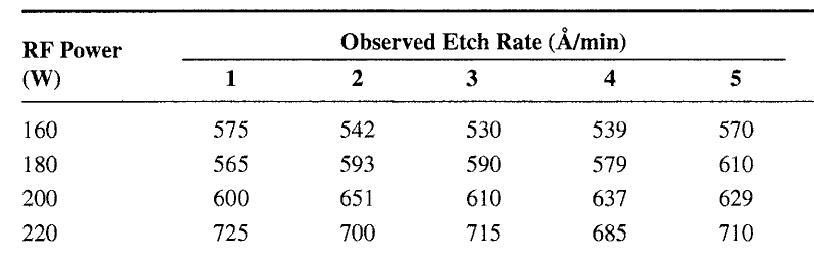

In [8]:
df1 = pd.DataFrame({'RF_Power' : ['160']*5 + ['180']*5 + ['200']*5 + ['220']*5,
                    'Observed' : [575,542,530,539,570,
                                  565,593,590,579,610,
                                  600,651,610,637,629,
                                  725,700,715,658,710]})

display(df1)

,RF_Power,Observed
0,160,575
1,160,542
2,160,530
3,160,539
4,160,570
5,180,565
6,180,593
7,180,590
8,180,579
9,180,610


In [9]:
# melihat summary statistik
display(rp.summary_cont(df1['Observed'].groupby(df1['RF_Power'])))

,N,Mean,SD,SE,95% Conf.,Interval
RF_Power,,,,,,
160,5,551.2,20.0175,8.9521,526.3450,576.0550
180,5,587.4,16.7422,7.4873,566.6119,608.1881
200,5,625.4,20.5256,9.1793,599.9141,650.8859
220,5,701.6,25.9865,11.6215,669.3335,733.8665


dapat dilihat bahwa varians antar kelompok RF Power cukup homogen

In [10]:
# perhitungan anova
model1 = ols('Observed ~ C(RF_Power)', data=df1).fit()
aov_table1 = sm.stats.anova_lm(model1, typ=1) # type 1 digunakan ketika ingin melihat pengaruh faktor utama dan interaksinya

display(aov_table1)

,df,sum_sq,mean_sq,F,PR(>F)
C(RF_Power),3.0,62160.4,20720.133333,46.624962,3.922073e-08
Residual,16.0,7110.4,444.400000,NaN,NaN


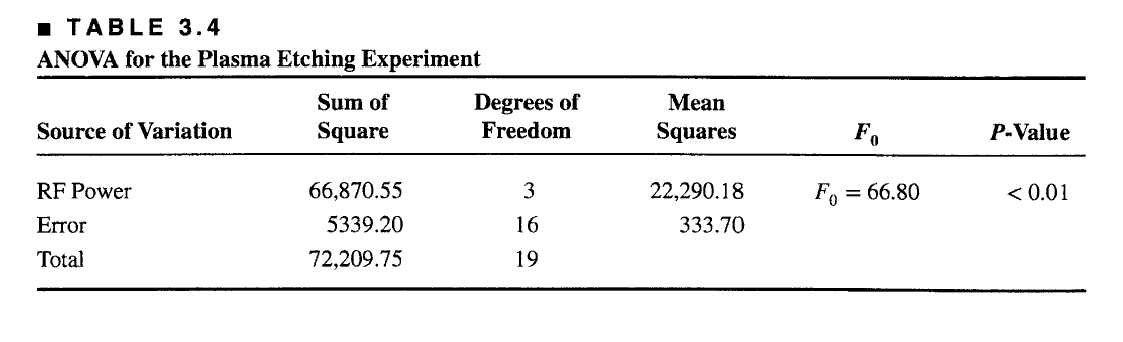

# kesimpulan

berdasarkan hasil perhitungan yang dilakukan oleh python, dapat diperoleh bahwa nilai secara angka berbeda dengan yang ada di buku, tetapi menghasilkan kesimpulan yang sama, yaitu menolak H0. artinya variasi dari RF Power memberikan **pengaruh yang signifikan** terhadap rata-rata *etch rate*

source : 
1. https://www.pythonfordatascience.org/anova-python/
2. Montgomery, Design and Analysis Experiment